# Template matching
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template

In [2]:
# Load image
image = data.coins()
# Template
coin = image[170:220, 75:130]

# Match template
result = match_template(image, coin, pad_input=True)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

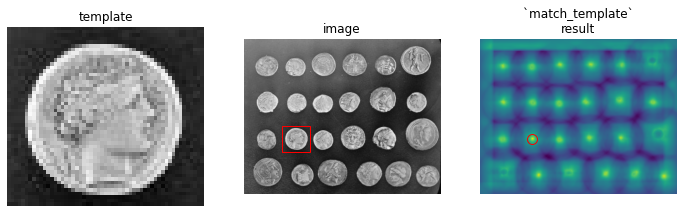

In [3]:
# Make figure
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

# Template image
ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')
# Image
ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x-wcoin//2, y-hcoin//2), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)
# Result
ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10);

## Section image
---

In [4]:
from pathlib import Path

from scipy import signal
from skimage import io, util, exposure, color

In [7]:
# Collect section images
fps = list(Path('D:/rlane/Data/KEYENCE/_REPOSITORY/').glob('*.tif'))

# Load image
# fp = np.random.RandomState(136).choice(fps, 1)[0]
fp = Path('D:/rlane/Data/KEYENCE/_REPOSITORY/20201026_UMCU_HC005.tif')
base = io.imread(fp)
image = base.copy()

# --- Process ---
# Crop
cw = 1000  # crop width
h, w, _ = image.shape
cx, cy = -400, -1000
crop_width = (((h-cy-cw)//2, (h+cy-cw)//2),
              ((w-cx-cw)//2, (w+cx-cw)//2),
              (0, 0))
image = util.crop(image, crop_width=crop_width, copy=True)

# Template
x1, x2 = (780, 890)
y1, y2 = (495, 605)
template = image[y1:y2, x1:x2]
# Match template
result = color.rgb2gray(match_template(image, template, pad_input=True))

In [8]:
peaks, _ = signal.find_peaks(result.ravel(), prominence=0.5, distance=3e4)
y, x = np.unravel_index(peaks, result.shape)

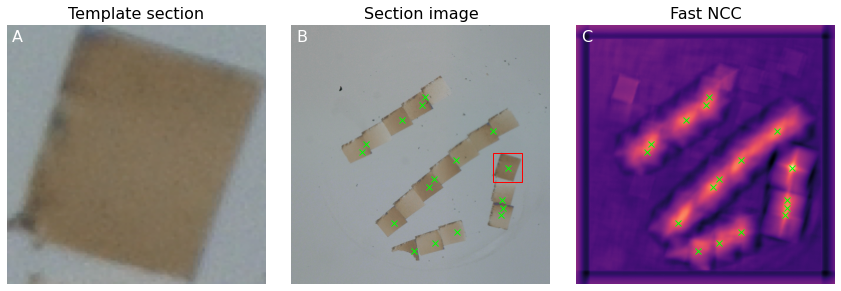

In [9]:
# Make figure
ncols = 3
fig, axes = plt.subplots(ncols=ncols, figsize=(4*ncols, 4))
# Images
axes[0].imshow(template)
axes[1].imshow(image)
axes[2].imshow(result, cmap='magma')
# Peaks
axes[1].plot(x, y, 'x', color='#00ff00')
axes[2].plot(x, y, 'x', color='#00ff00')
# Box
box = plt.Rectangle((x1, y1), width=(x2-x1), height=(y2-y1), facecolor='none', edgecolor='red')
axes[1].add_patch(box)
# Aesthetics
titles = ['Template section', 'Section image', 'Fast NCC']
labels = ['A', 'B', 'C']
[ax.set_title(title, fontsize=16) for title, ax in zip(titles, axes)]
[ax.text(0.02, 0.98, label, va='top', transform=ax.transAxes, fontsize=16, color='white') for label, ax in zip(labels, axes)]
[ax.axis('off') for ax in axes]
plt.tight_layout()